In [1]:
import os
import numpy as np
import pandas as pd
import sys

from sklearn.manifold import TSNE
from gensim.models import Word2Vec

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_sequences(filename, sep=" ", min_len=1):
    for line in open(filename, "r"):
        sequence = line.split(sep)[:-1]
        if len(sequence) >= min_len:
            yield sequence
            
def scatter_plot(two_dim_vecs, word_labels=None, colors="#00897B", user="chrispolo", api_key="89nned6csl"):
    py.sign_in(user, api_key)

    x_coord = two_dim_vecs[:, 0]
    y_coord = two_dim_vecs[:, 1]

    trace = go.Scattergl(
        x = x_coord, #
        y = y_coord, #
        mode = 'markers',
        text = word_labels, #
        marker = dict(
            color = colors,
            line = dict(width = 1)
        )
    )

    data = [trace]
    return data

### Training the Model

In [3]:
walks_path_nc  = "../dataset/embedding_topical_concepts_en.ttl.txt"

vocab_sequences = get_sequences(walks_path_nc)
train_sequences = get_sequences(walks_path_nc)

model = Word2Vec(min_count=1, window=5, negative=5, sg=1)

model.build_vocab(vocab_sequences)
model.train(train_sequences)

40358

### Dim reduction of embeddings

In [4]:
embeddings = [model[uri] for uri in model.vocab]
uris = [uri for uri in model.vocab]

tsne = TSNE(n_components=2)
twodim_embeddings = tsne.fit_transform(embeddings)

### Plot

In [5]:
scatter_data = scatter_plot(twodim_embeddings, uris)
py.iplot(scatter_data, filename='Data')

Check it [here](https://plot.ly/create/?fid=chrispolo:1238)

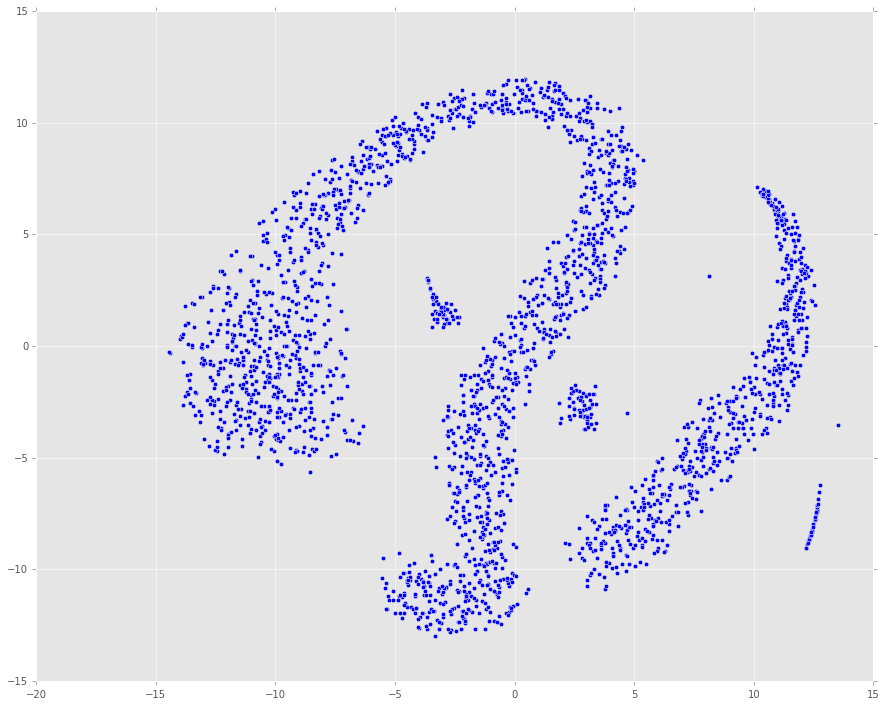

In [6]:
fig_size = [15, 12]
plt.rcParams["figure.figsize"] = fig_size
x = [point[0] for point in twodim_embeddings]
y = [point[1] for point in twodim_embeddings]
plt.scatter(x, y)
plt.show()